In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datasets/titanic_data.csv", index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
num_cols = ["Age", "Fare"]
df_num = df[num_cols]
df_num.head()

,Age,Fare
PassengerId,,
1,22.0,7.2500
2,38.0,71.2833
3,26.0,7.9250
4,35.0,53.1000
5,35.0,8.0500


In [4]:
mean = df_num.mean(axis=0)
mean

Age     29.699118
Fare    32.204208
dtype: float64

In [5]:
std = df_num.std(axis=0)
std

Age     14.526497
Fare    49.693429
dtype: float64

In [6]:
df_num_z = (df_num - mean) / std
df_num_z.head()

,Age,Fare
PassengerId,,
1,-0.530005,-0.502163
2,0.571430,0.786404
3,-0.254646,-0.488580
4,0.364911,0.420494
5,0.364911,-0.486064


/Users/shawlu/anaconda3/envs/analytics/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/shawlu/anaconda3/envs/analytics/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

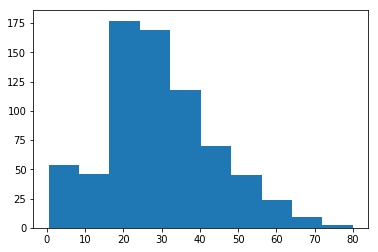

In [7]:
plt.hist(df_num["Age"])

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([-2.01556624, -1.46773976, -0.91991327, -0.37208678,  0.1757397 ,
         0.72356619,  1.27139268,  1.81921917,  2.36704565,  2.91487214,
         3.46269863]),
 <a list of 10 Patch objects>)

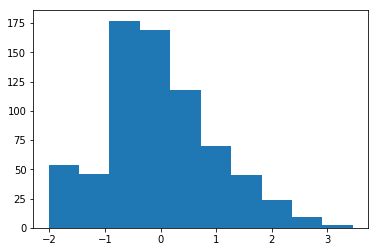

In [8]:
plt.hist(df_num_z["Age"])

#### Utility Function Modifying Original Dataframe

In [9]:
def standardize(df, cols):
    df_num = df[cols]
    mean = df_num.mean(axis=0)
    std = df_num.std(axis=0)
    
    return (df_num - mean) / std

In [10]:
num_cols = ["Age", "Fare"]
df[num_cols] = standardize(df, num_cols)

In [11]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,-0.530005,1,0,A/5 21171,-0.502163,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571430,1,0,PC 17599,0.786404,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,-0.254646,0,0,STON/O2. 3101282,-0.488580,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.364911,1,0,113803,0.420494,C123,S
5,0,3,"Allen, Mr. William Henry",male,0.364911,0,0,373450,-0.486064,NaN,S
